In [1]:
# Importing the important packages and libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from statsmodels.tsa.arima.model import ARIMA
%matplotlib inline

# Step1: Data Collection 

In [2]:
# This is the original data of cryptocurrency that has been collected from the Kaggle Repository. 
# In our research, we have taken Ethereum & ADA Cardano coins to better understand the forecasting using 
# AutoRegressive Integrated Moving Average (ARIMA) which is a supervised machine learning technique for non-linear regression data.
# Machine Learning technique. Ethereum and ADA Cardano are both comparatively very stable and popular coins with
# high investment.
df = pd.read_csv("BNB-USD.csv")

# Step2: Data Preparation

In [3]:
# We need to prepare the data for the Machine Learning model.It is a Regression case where the dependent variable
# i.e. Y (output) is qualitative.Therefore, we need to prepare our csv file for the Regression algorithm.


In [4]:
print(df)

                timestamp    adjclose        open         low        high  \
0     2017-11-09 00:00:00    1.990770    2.053140    1.893940    2.174230   
1     2017-11-10 00:00:00    1.796840    2.007730    1.644780    2.069470   
2     2017-11-11 00:00:00    1.670470    1.786280    1.614290    1.917750   
3     2017-11-12 00:00:00    1.519690    1.668890    1.462560    1.672800   
4     2017-11-13 00:00:00    1.686620    1.526010    1.517600    1.735020   
...                   ...         ...         ...         ...         ...   
1780  2022-09-24 00:00:00  275.135376  276.627045  275.135376  284.632446   
1781  2022-09-25 00:00:00  274.061249  275.104340  271.673126  279.201691   
1782  2022-09-26 00:00:00  275.927856  274.141785  271.188324  276.446991   
1783  2022-09-27 00:00:00  272.401550  275.925964  270.822083  286.067993   
1784  2022-09-28 08:54:00  270.296082  272.556488  267.090698  273.511993   

         volume       close  
0      19192200    1.990770  
1      11155000

In [5]:
# Data Cleaning: 
# In the CSV(Comma Separated Values) file of each coin,we can see that there are 7 features in total, indicating
# the coin timestamp(in 24 hrs), adjusted close,open(coin ),high,volume,low and close .Out of these features,
# the "Adjusted Close" has been considered as the dependent Variable (Y).

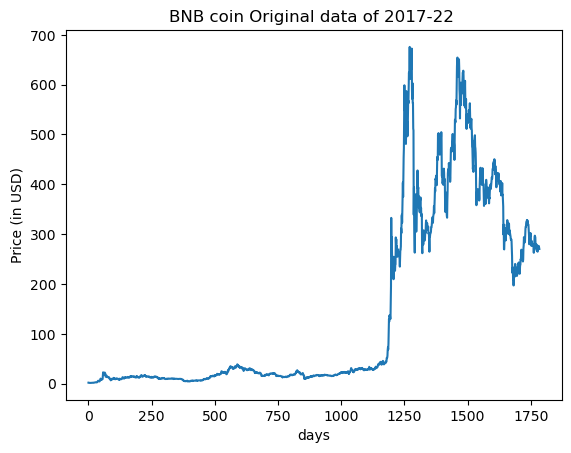

In [6]:

plt.plot(df.index, df['adjclose'])
plt.title('BNB coin Original data of 2017-22 ')
plt.xlabel('days')
plt.ylabel('Price (in USD)')
plt.show()

In [7]:
# Feature Selection:
# Since it is a Time-Series Analysis problem, where the Y (output) is dependent only on time.
#Therefore,the 'timestamp' feature is considered as the only independent variable 'x'.
# The 'Adjusted close' column is treated as the dependent variable "Y" or the predictor variable.
  
# Converting the'x'variable i.e. the Days column in to date-time format, to be treated as the index of Y here.
df['timestamp'] = pd.to_datetime(df["timestamp"])
df.set_index('timestamp', inplace = True)


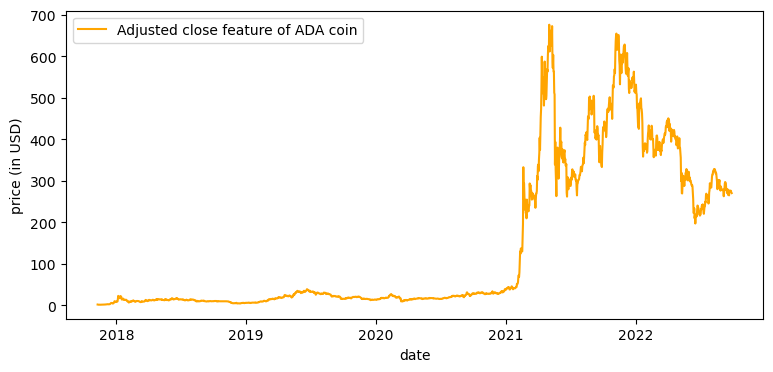

In [8]:
plt.figure(figsize=(9,4))
plt.plot(df['adjclose'],color='orange', label= 'Adjusted close feature of ADA coin')
plt.xlabel("date")
plt.ylabel('price (in USD)')
plt.legend()
plt.show()

# Step 3: Exploratory Data Analysis(EDA)

Text(0, 0.5, 'price (in USD)')

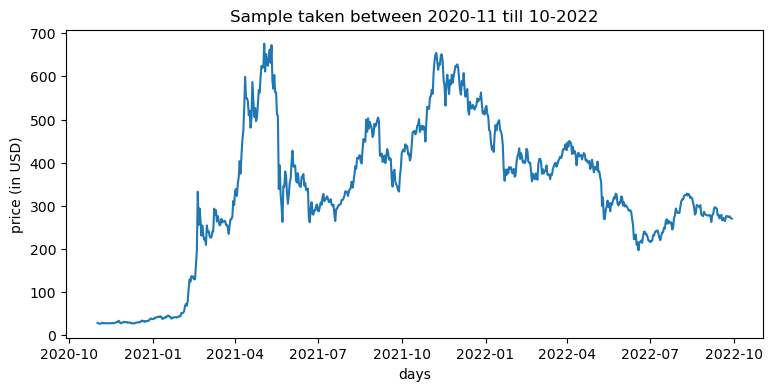

In [9]:
# Step 1: Feature Engineering
# The dependent variable (Y) is taken as a sample, starting from 2020-01 till the end date i.e. 28-09-2022.
# Because we can examine that from 2018 till 12-2019, the data is almost stationary which may not contribute much in the
# forecasting and thus,causes overfitting.Whereas, from 2020 till 9-2022, the data is juggling,which is suitable for
# the model fitting and that contributes better to behave consistantly in prediction with the recent trend.
plt.figure(figsize=(9,4))
df = df.loc['2020-11' : '2022']
plt.plot(df['adjclose'])
plt.title("Sample taken between 2020-11 till 10-2022" )
plt.xlabel("days")
plt.ylabel("price (in USD)")

In [10]:
# Dataset with date index (X - independent variable)
df['adjclose']

timestamp
2020-11-01 00:00:00     28.461565
2020-11-02 00:00:00     27.883930
2020-11-03 00:00:00     26.857050
2020-11-04 00:00:00     26.931515
2020-11-05 00:00:00     27.675859
                          ...    
2022-09-24 00:00:00    275.135376
2022-09-25 00:00:00    274.061249
2022-09-26 00:00:00    275.927856
2022-09-27 00:00:00    272.401550
2022-09-28 08:54:00    270.296082
Name: adjclose, Length: 697, dtype: float64

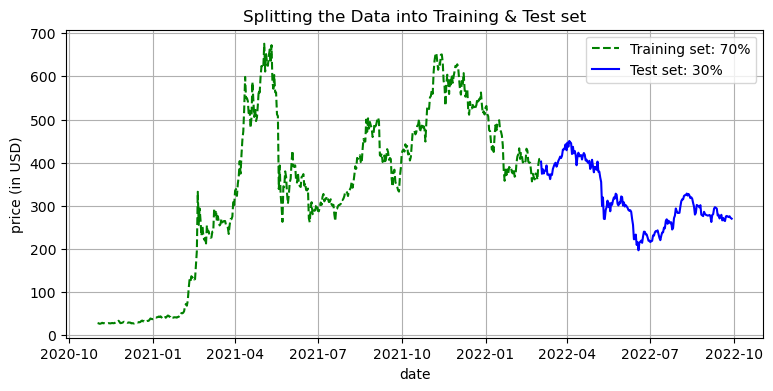

In [11]:
#step1: Feature Engineering/Variable Engineering:
# By analyzing the data graphically, we have divided the selected data (i.e. 9-2020 till 9-2022) sequentially into
# two samples i.e. training set and test. The initial 74% data is treated as our training set which has been used to 
# train the machine learning model/algorithm.While the remaining 26% data is taken as the test set which is used to 
# assess the performance of the trained model and to provide the estimation to the test error.

plt.figure(figsize=(9,4))
plt.grid(True)
to_row = int(len(df)*0.70)
training_data = list(df[0:to_row]['adjclose'])
testing_data = list(df[to_row:]['adjclose'])
plt.plot(df[0:to_row]['adjclose'],color='green', label= 'Training set: 70%',linestyle ='dashed')
plt.plot(df[to_row:]['adjclose'],color='blue', label= 'Test set: 30%')
plt.title("Splitting the Data into Training & Test set")
plt.xlabel("date")
plt.ylabel('price (in USD)')
plt.legend()
plt.show()

In [12]:
# Step 2: After the data is splitted into training set and test set,we need to check the stationarity 
# of the training set since it will be used to train the Machine Learning model.


In [13]:
# Testing for Stationarity of training set:
# Method1: 
# For checking the stationarity of training set, we have used (Augmented Dicky Fuller), also called Adfuller test.
# Using Dicky fuller test, the hypothesis testing with p-value= 0.05 is computed by considering the Null hypothesis(H0) as non-stationary
# and Alternate hypothesis (H1),representing the training data as stationary.
from statsmodels.tsa.stattools import adfuller
test_result=adfuller(training_data)

In [14]:
# Hypothesis Testing

# H0  = The training dataset is non- stationary
# H1  = The training dataset is Stationary
def adfuller_test(adjclose):
    result=adfuller(adjclose)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [15]:
# Adfuller test result:
adfuller_test(training_data)

ADF Test Statistic : -1.8217632012907767
p-value : 0.3697116447284309
#Lags Used : 6
Number of Observations Used : 480
Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [16]:
# Since the training set is Non-stationary, therefore,we need to make it stationary by taking the differentiation of 
# data with different orders i.e. the value 'q' of the ARIMA Model,until it becomes stationary.
# It can also be done with Auto-ARIMA or by visualizing the Auto-Correlation Function(ACF plot) having different differentiation orders of the data.

In [17]:
# Making the training set stationary by taking the first order difference
df['First Difference'] = df['adjclose'] - df['adjclose'].shift(1)

In [18]:
# Checking for 1 shift
df['First Difference']

timestamp
2020-11-01 00:00:00         NaN
2020-11-02 00:00:00   -0.577635
2020-11-03 00:00:00   -1.026880
2020-11-04 00:00:00    0.074465
2020-11-05 00:00:00    0.744345
                         ...   
2022-09-24 00:00:00   -1.490875
2022-09-25 00:00:00   -1.074127
2022-09-26 00:00:00    1.866608
2022-09-27 00:00:00   -3.526306
2022-09-28 08:54:00   -2.105469
Name: First Difference, Length: 697, dtype: float64

In [19]:
# Removing the 'Nan' values and Applying the adfuller test to check for the P-value 
adfuller_test(df['First Difference'].dropna())
# Since the training set became stationary after taking the first order difference since the p value is became increased,therefore we may set the d value of ARIMA model as 1.

ADF Test Statistic : -10.513804813346052
p-value : 1.008492755831015e-18
#Lags Used : 5
Number of Observations Used : 690
Strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


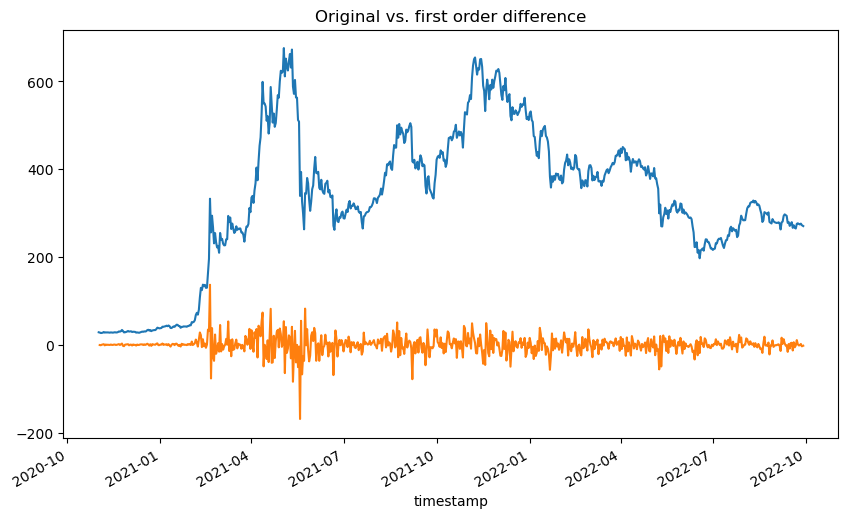

In [20]:
# Visualizing the Stationarity 
plt.figure(figsize=(10,6))
plt.title("Original vs. first order difference")
df['adjclose'].plot()
#df['First Difference'].plot()
#plt.plot(df['adjclose'], label = 'original')
plt.plot(df['First Difference'], label ='stationary with 1st order ')

In [21]:
# Before applying the ARIMA model,we need to analyze the data and find out the 3 parameters of ARIMA model
# which are (AR, I, MA) also called (P,d,q), where 'p' is called Auto-Regressive, 'd' is the Integrated part which is the order of difference to make the data stationary
# and 'q' is called the Moving-Average.


In [22]:
# Method 1: Using Auto-ARIMA technique to find the value of (p,d,q). In Auto ARIMA, the model itself will generate 
#the optimal p, d, and q values which would be suitable for the data set to provide better prediction.
# This technique computes the optimal value of p, d, and q by using different combinations and the final values
#would be determined with the lower AIC(Akaike information criterion (AIC)), BIC(Bayesian information criterion)
# parameters taking into consideration.


# Finding the order of the ARIMA model i.e. to identify the P,d,q values by using Auto-ARIMA
from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore")

In [23]:
step_wise_fit = auto_arima(list(df[0:to_row]['adjclose']), trace=True, suppress_warnings=True)
# Here we can see that the order(p,d,q)=(1,1,1) is having lower AIC score that is -923 compared to other orders
# Hence, the AutoARIMA technique recommended this order as the 'best model' which is depicted in the result.

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=4415.154, Time=0.55 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=4425.771, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=4418.791, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=4420.093, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=4424.340, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=4418.241, Time=0.27 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=4419.300, Time=0.33 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=4416.887, Time=0.84 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=4416.939, Time=1.37 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=4418.748, Time=0.39 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=4419.606, Time=0.83 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=4420.639, Time=0.54 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=4414.229, Time=1.57 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=4414.337, Time=1.75 sec
 ARIMA(3,1,4)(0,0,0)[0] intercept

In [24]:
# Method 2 : To find the order of ARIMA model i.e.(p,d,q), the 3 parameters value for better forecasting is by 
#  visualizing the Partial Auto-Correlation (PACF) and ACF(Auto-Correlation Function) plot to choose the value of 'P' (Auto-Regression)
# 'd'(Integration) and "q"(Moving-Average) value respectively.

In [25]:
# Determining the (p,d,q) values for ARIMA using Auto-Correlation Function and Partial Auto-Correlation Function
from statsmodels.graphics.tsaplots import plot_acf

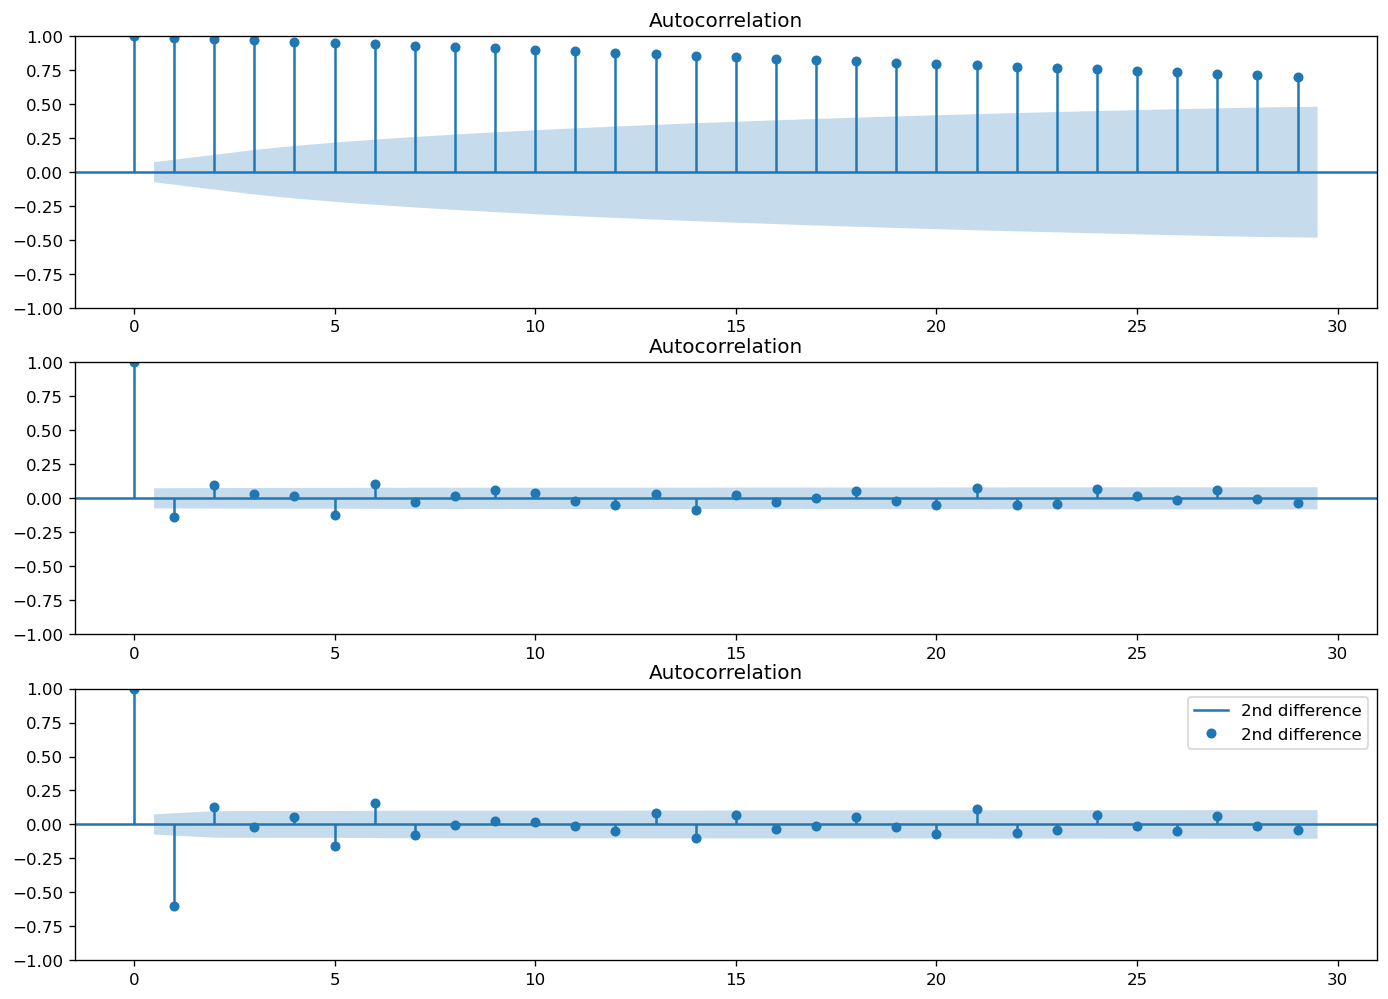

In [26]:
# checking the differencing "D" with Auto-Correlation Function(ACF)
plt.rcParams.update({'figure.figsize':(14,10), 'figure.dpi':120})
fig, (ax1, ax2, ax3) = plt.subplots(3)

plot_acf(df['adjclose'], ax=ax1, label='Actual data')

plot_acf(df['adjclose'].diff().dropna(), ax=ax2, label = '1st difference')

plot_acf(df['adjclose'].diff().diff().dropna(), ax=ax3, label = '2nd difference')
plt.legend()
plt.show()

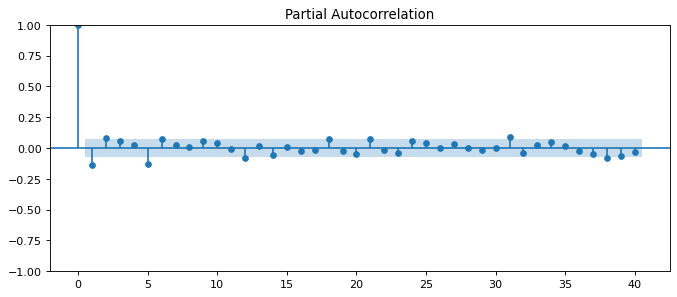

In [27]:
# Partial AutoCorrelation graph (PACF) to check for AutoRegresive(P) and Moving value(q) for the ARIMA model
plt.rcParams.update({'figure.figsize':(10,4), 'figure.dpi':80})
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(df.adjclose.diff().dropna(),lags = 40)
plt.show()

In [28]:
# After visualizing with ACF and PACF graph , we may set the ARIMA orders as (p,d,q) = (1,1,1)

# Step 4: Machine Learning Model Selection

In [29]:
# We have applied the ARIMA(Auto-Regressive Integrated Moving Average) model with the orders (p,d,q) as (1,1,1) for the forecasting. ARIMA is a supervised learning
# algorithm used for the Regression and time-series analysis where the univariate data(Y) is dependent only on the time (X).

In [30]:
# fitting the ARIMA Model with the order(1,1,1) on the previous 74% data as a training set and then testing the models
# by comparing the test dataset (remaining 26% data) with the model predictions.
# numbers 
model_predictions = []
n_test_obser = len(testing_data)
for i in range(n_test_obser):
    model = ARIMA(training_data, order = (5,2,5))
    model_fit = model.fit()
    #output =model_fit.forecast(steps = 120)
    output = model_fit.forecast()
    y_hat = np.array(output[0])
    model_predictions.append(y_hat)
    actual_test_value = testing_data[i]
    training_data.append(actual_test_value)

In [31]:
# Actual vs Predicted values
testing_data = np.round(testing_data[:], 1)
model_predictions= np.round(model_predictions[:],1)
testing_data = np.array(testing_data).reshape(-1,1)

data = pd.DataFrame(testing_data)
data["Predicted Values"] = model_predictions
data.head(10)

,0,Predicted Values
0,402.6,412.8
1,374.3,408.1
2,384.9,372.9
3,375.0,381.4
4,381.3,379.5
5,382.0,381.8
6,393.6,382.6
7,372.2,389.9
8,372.2,380.7
9,372.7,369.6


In [32]:
data.tail(10)

,0,Predicted Values
200,272.1,265.7
201,266.4,273.0
202,264.8,265.6
203,275.5,266.1
204,276.6,275.1
205,275.1,275.9
206,274.1,278.0
207,275.9,273.3
208,272.4,275.8
209,270.3,272.9


In [33]:
# Comparing the first 50 actual and predicted values
a = testing_data[:50].reshape(5,-1)
print("ACTUAL VALUES\n", a)

ACTUAL VALUES
 [[402.6 374.3 384.9 375.  381.3 382.  393.6 372.2 372.2 372.7]
 [361.8 373.5 371.6 385.5 391.8 397.6 399.9 390.8 396.4 404.3]
 [408.6 414.1 410.8 415.9 430.5 430.4 434.5 442.7 428.9 446.6]
 [437.  450.3 447.5 445.2 420.1 436.8 421.7 427.2 418.6 394.1]
 [413.9 423.1 414.7 417.3 417.5 407.4 417.  422.4 418.4 405. ]]


In [34]:
print("Predicted Values\n",model_predictions[:50] )

Predicted Values
 [412.8 408.1 372.9 381.4 379.5 381.8 382.6 389.9 380.7 369.6 372.3 362.5
 376.6 370.4 383.4 396.4 396.2 402.3 390.  399.  402.2 410.  416.1 411.2
 416.2 429.3 434.  434.5 442.7 430.9 446.5 438.8 448.4 452.  443.5 426.
 430.9 426.8 426.  422.5 393.5 412.8 423.1 417.7 420.1 413.  412.2 416.3
 422.7 418.6]


In [35]:
# Comparing the first 10 Actual and Predicted values

In [36]:
a = testing_data[:10].reshape(5,-1)
print("ACTUAL VALUES\n", a)

ACTUAL VALUES
 [[402.6 374.3]
 [384.9 375. ]
 [381.3 382. ]
 [393.6 372.2]
 [372.2 372.7]]


In [37]:
print("Predicted Values\n",model_predictions[:10] )

Predicted Values
 [412.8 408.1 372.9 381.4 379.5 381.8 382.6 389.9 380.7 369.6]


# Step5: Model Validation

In [38]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score


#Method 1: Using R2 SCORE
print("Computing the R-squared value:")
r2_score = r2_score(testing_data,model_predictions[:])
print(f'r2_score:{r2_score}')

Computing the R-squared value:
r2_score:0.9710011261575853


In [39]:
# Method2: Report performance check with MEAN ABSOLUTE PERCENTAGE ERROR
MAPE = np.mean(np.abs(np.array(model_predictions[:]) - np.array(testing_data)) / np.abs(testing_data))
print(f'Mean_Absolute_Percentage_Error:{MAPE}')

Mean_Absolute_Percentage_Error:0.24712094394451053


In [40]:
# Method3: Using MEAN ABSOLUTE ERROR
from sklearn.metrics import mean_absolute_error
MAE = mean_absolute_error(model_predictions[:],testing_data)
print(f'Mean_Absolute_Error:{MAE}')

Mean_Absolute_Error:8.38190476190476


In [41]:
from sklearn.metrics import mean_squared_error
import math
MSE = mean_squared_error(model_predictions[:],testing_data)
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)

Root Mean Square Error:

11.357468698530285


# Step6: Visualization of Results

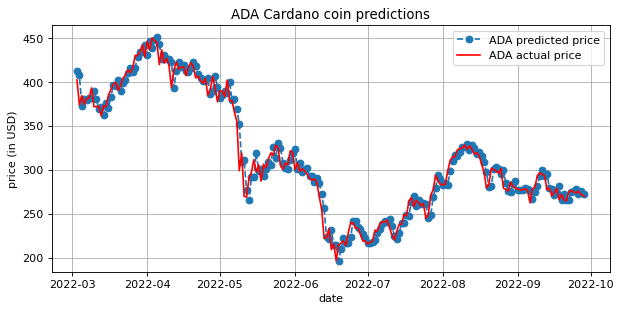

In [42]:
plt.figure(figsize=(9,4))
plt.grid(True)
date_range = df[to_row:].index
#plt.plot(date_range, model_predictions[:-1],color='blue',marker='o',linestyle ='dashed',label = "ADA predicted price")
plt.plot(date_range,model_predictions[:],marker='o',linestyle ='dashed',label = "ADA predicted price")
plt.plot(date_range,testing_data,color='red',label = "ADA actual price")
plt.title("ADA Cardano coin predictions")
plt.xlabel("date")
plt.ylabel('price (in USD)')
plt.legend()
plt.tight_layout
plt.show()

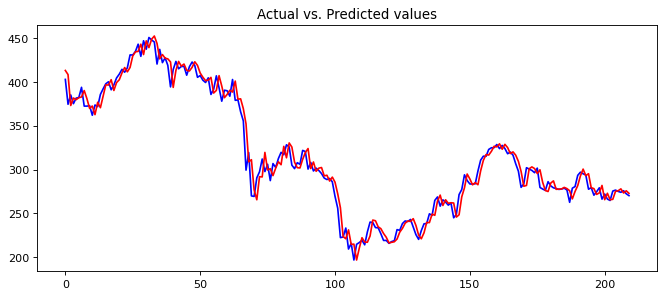

In [43]:
# Actual values Vs. Predicted Values
plt.plot(testing_data,color='blue')
plt.plot(model_predictions,color='red')
plt.title("Actual vs. Predicted values")
plt.show()

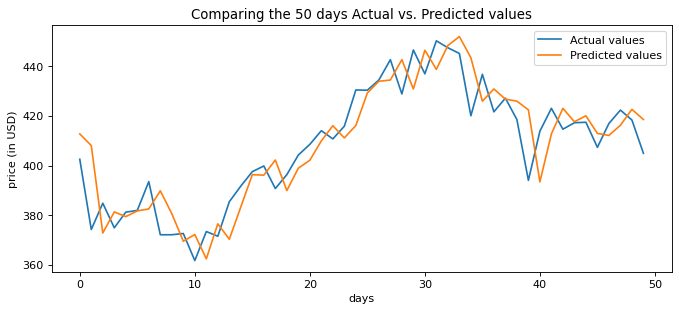

In [44]:
plt.plot(testing_data[:50],label = 'Actual values')
plt.plot(model_predictions[:50], label = 'Predicted values')
plt.title('Comparing the 50 days Actual vs. Predicted values')
plt.xlabel('days')
plt.ylabel('price (in USD)')
plt.legend()
plt.show()

In [45]:
# from statsmodels.graphics.tsaplots import plot_predict
# from statsmodels.tsa.arima.model import ARIMA

# plt.figure(figsize=(9,4))
# plot_predict(1,800)
# plt.title('Depicting the next forecasting range with 95% Confidence interval')
# plt.xlabel('Days')
# plt.ylabel('price (in USD)')
# plt.show()

# Step7: Forecasting of the next 10 days

In [46]:
# future_days = model_fit.forecast(steps=10)
# print(future_days)

In [47]:
data.head(10)

,0,Predicted Values
0,402.6,412.8
1,374.3,408.1
2,384.9,372.9
3,375.0,381.4
4,381.3,379.5
5,382.0,381.8
6,393.6,382.6
7,372.2,389.9
8,372.2,380.7
9,372.7,369.6


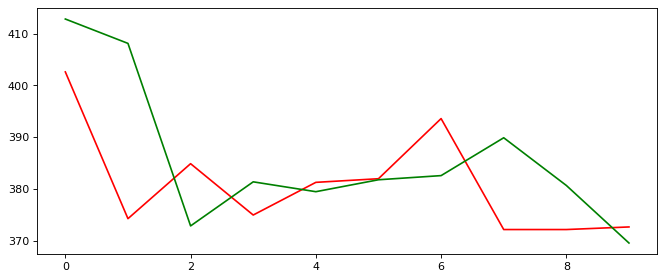

In [48]:
Actual = testing_data[:10]
predicted = model_predictions[:10]
plt.plot(Actual, color='red')
plt.plot(predicted,color = 'green')

In [49]:
# performance Evaluation of 10 days Predictions

In [50]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
print("Computing the R-squared value:")
r2_score = r2_score(Actual,predicted)
print(f'r2_score:{r2_score}')

Computing the R-squared value:
r2_score:-1.061759682778558


In [51]:
# report performance
MAPE = np.mean(np.abs(np.array(predicted) - np.array(Actual)) / np.abs(Actual))
print(f'Mean_Absolute_Percentage_Error:{MAPE}')

Mean_Absolute_Percentage_Error:0.034139803675788866


In [52]:
from sklearn.metrics import mean_squared_error
import math
MSE = mean_squared_error(Actual, predicted)
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)

Root Mean Square Error:

13.967354796095071


In [53]:
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(predicted,Actual))

10.469999999999994
